# Set the camera axes register to world axes.

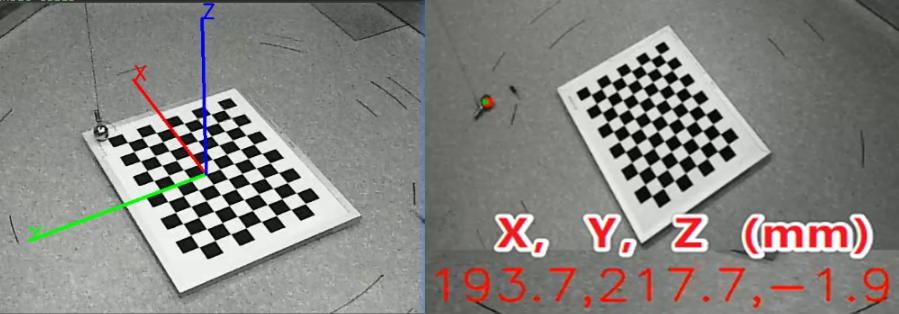

In [1]:
import numpy as np
import p1_checkboard_global

In [2]:
# Output of 1_intrinsic_calib 
intrinsic_json = 'intrinsics_calib_carl.json'
video_snapshot = 'demo_data/checkboard_centered.mp4' #only take the first frame
board_size = (11, 8) #number of joints in the checkboard
square_size = 20.0  #millimeter in this case


## Step1: Detect the checkboard
The result is saved in `demo_data`. The `origin point` and `axes direction` is shown/defined below.

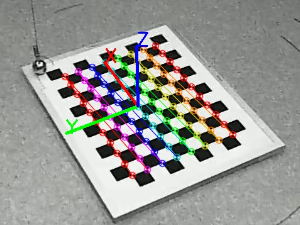

In [3]:
p1_checkboard_global.convert(video_snapshot, intrinsic_json, board_size, square_size)

## Check the detected checkboard joints

In [4]:
import pickle
globalref = pickle.load(open('demo_data/checkboard_centered.globalrefpkl', 'rb'))
print(globalref.keys())
print(globalref['keypoint_xyz'].shape) #njoint, xyz
print(globalref['keypoint_xy'].shape) #nview, njoint, xy

dict_keys(['board_size', 'square_size', 'keypoint_xyz', 'keypoint_xy'])
(88, 3)
(9, 88, 2)


## Step2: register multiview system to world axes

In [5]:
from p2_calibpkl_refine_byglobal import main as p2_main
import shutil

In [6]:
calibpkl = 'multiview_no_world_axes.calibpkl'
globalrefpkl = 'demo_data/checkboard_centered.globalrefpkl'
recalibpkl = p2_main(calibpkl, globalrefpkl)

         Current function value: 0.197718
         Iterations: 21
         Function evaluations: 568
         Gradient evaluations: 71
error_dist: 0.20 ± 0.14 mm, max: 1.19 mm
Global registration success.
recalibpkl saved as multiview_no_world_axes.recalibpkl


In [7]:
shutil.move(recalibpkl, 'multiview_with_world_axes.calibpkl')
recalibpkl = 'multiview_with_world_axes.calibpkl'
recalib = pickle.load(open(recalibpkl, 'rb'))
print(recalib.keys())

dict_keys(['setup', 'intrinsics', 'ba_poses'])
